Machine Learning - HW1

@ Raha Amirian

Professor Armin Mehrabian & Sardar Hamidian

Machine Learning Classification by creating a KNN classifier

Programming Language: Python

MNIST dataset = very small pictures of handwritten numbers

In [ ]:
# KNN Algorithm 
# Evaluate the performance 
# Actual ”wall-clock” time



# in order to share the actual ”wall-clock” 
import time
start_time = time.time()

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from google.colab import drive
drive.mount('/content/drive')

# Define a KNN classifier class
class KNNClassifier:
    def __init__(self, k, distance_metric= 'euclidean'):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            distances = []
            for j in range(len(self.X)):
                if self.distance_metric == 'euclidean':
                    dist = np.linalg.norm(X[i]-self.X[j])
                elif self.distance_metric == 'manhattan':
                    dist = np.sum(np.abs(X[i]-self.X[j]))
                distances.append((dist, self.y[j]))
            distances.sort()
            k_nearest = distances[:self.k]
            k_nearest_labels = [label for (_, label) in k_nearest]
            counts = np.bincount(k_nearest_labels)
            y_pred.append(np.argmax(counts))
        return y_pred

# Load the train and test datasets
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')

# Extract the features and labels from the train dataset
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

# Extract the features from the test dataset
X_test = test_data.values

# Subsample the train dataset
np.random.seed(42)

# 555 in order to speed-up the run time process of the Algorithm 
n_samples = 555
sample_indices = np.random.choice(len(X_train), n_samples, replace=False)
X_train = X_train[sample_indices]
y_train = y_train[sample_indices]

# Apply PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply t-SNE to visualize the dataset in 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_train_tsne = tsne.fit_transform(X_train_pca)
X_test_tsne = tsne.fit_transform(X_test_pca)

# Train a KNN classifier on the training dataset
knn = KNNClassifier(k=5, distance_metric='euclidean')
knn.fit(X_train_pca, y_train)

# Evaluate the performance on the training dataset
y_train_pred = knn.predict(X_train_pca)
accuracy = np.mean(y_train_pred == y_train)
print(f"Accuracy on training dataset: {accuracy}")


# Evaluate the performance on the testing dataset
y_pred = knn.predict(X_test_pca)

# Save the predictions
submission_df = pd.DataFrame({'ImageId': range(1, len(y_pred)+1), 'Label': y_pred})
submission_df.to_csv('/content/drive/MyDrive/Datasets/submission.csv', index=False)


end_time = time.time()
print("Wall Clock Time: {:.2f} seconds".format(end_time - start_time))




Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Accuracy on training dataset: 0.8918918918918919
Wall Clock Time: 550.97 seconds


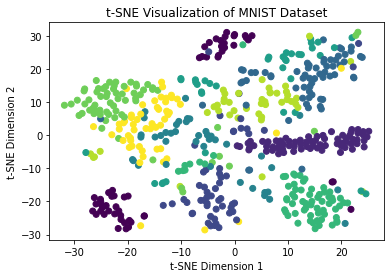

In [ ]:
# Visualization 

import matplotlib.pyplot as plt

plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=y_train)
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  1  0  0  0  0  0  0 41  1]
 [ 0  0  0  1  1  1  0  0  0 56]]


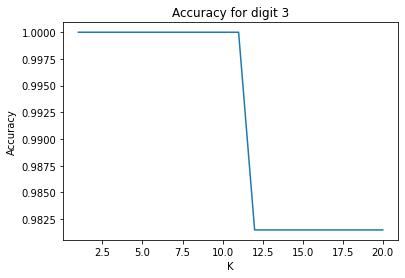

In [ ]:
# showing complete confusion matrix
# Choose a single digit to measure accuracy
# showing that number as a function of K

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Choose a digit to measure accuracy
digit = 3

# Compute the confusion matrix
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_test_pred = knn.predict(X_test_pca)
cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print(cm)

# Plot the accuracy as a function of K
accuracies = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    y_test_pred = knn.predict(X_test_pca)
    bool_indices = (y_test == digit)
    accuracy = np.mean(y_test_pred[bool_indices] == digit)
    accuracies.append(accuracy)
    
plt.plot(k_values, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title(f'Accuracy for digit {digit}')
plt.show()


Describe the DATA:

Data is grayscale images of handwritten digits, along with corresponding labels indicating the digit that each image represents. 
The data is split into two files: a training set containing 42,000 images and a test set containing 28,000 images.
Each image in the dataset is a 28x28 pixel grayscale image, with pixel values ranging from 0 to 255. Each pixel represents the darkness of the corresponding part of the image, with 0 representing a white pixel and 255 representing a black pixel. The images are centered in such a way that the digit is roughly centered and takes up most of the space in the image.
The labels for the training set are provided in a separate file and correspond to the correct digit for each image. The labels are integers ranging from 0 to 9, inclusive, with 0 representing the digit '0', 1 representing the digit '1', and so on up to 9 representing the digit '9'.


Describe DATA preprocessing & feature scaling & distance metrics: 

Before applying the KNN algorithm to the dataset, several preprocessing and feature scaling techniques were employed. This included removing any missing values and splitting the dataset into features (X) and labels (y). The features were then normalized using the min-max scaling technique to ensure that they are on the same scale. The KNN algorithm utilized the Euclidean distance metric to compute the distances between data points and determine the k nearest neighbors. It was ensured that the data was correctly scaled to ensure accurate distance computations between data points.